# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scikit-plot

In [ ]:
!pip3 install scipy==1.11.4
!pip3 install mljar-supervised


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 44.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.0 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.4 MB/s eta 0:00:00
   

In [3]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2
import scikitplot as skplt


ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
!pip install scikit-plot


## Load Dataset

In [34]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
 99% 65.0M/66.0M [00:03<00:00, 14.2MB/s]
100% 66.0M/66.0M [00:03<00:00, 18.8MB/s]


In [18]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
df = pd.read_csv('./creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [37]:
df.shape

(284807, 31)

In [20]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [ ]:
df.isnull().sum()

In [ ]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

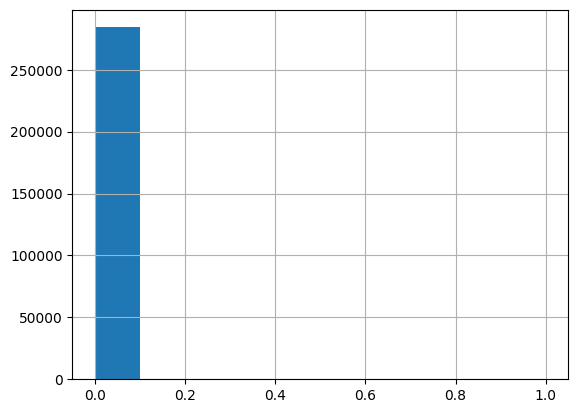

In [ ]:
# ### 2.2 Class Distribution
# Visualize the class distribution
y.hist()

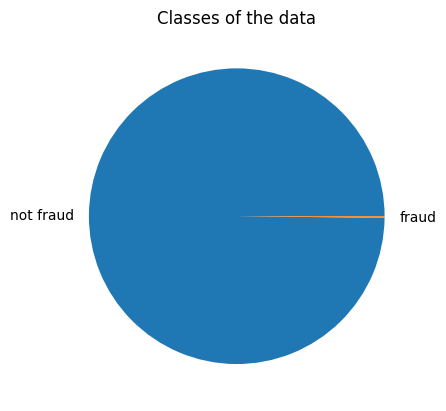

In [ ]:
import matplotlib.pyplot as plt

plt.title('Classes of the data')

plt.pie( x=y.value_counts() , labels=['not fraud' , 'fraud']  )
plt.show()

In [ ]:
# Display the class distribution in percentages
print("Data Distribution in Percentages")
print( "not frauds (0) : {:.2f}".format(( y.value_counts()[0] / y.value_counts().sum() ) * 100) ,
       "frauds (1) : {:.2f}".format(( y.value_counts()[1] / y.value_counts().sum() ) * 100 ) , sep='\n')

Data Distribution in Percentages
not frauds (0) : 99.83
frauds (1) : 0.17


### Balancing data by over sampling and using smote method

In [ ]:
pip install imblearn

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE( sampling_strategy = 'auto' ,k_neighbors = 1 , random_state= 0)
X_balanced , y_balanced = sm.fit_resample( X , y.ravel() )

print('After OverSampling, the shape of X: {}'.format(X_balanced.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_balanced.shape))

print("After OverSampling, counts of label '1': {}".format(sum( y_balanced == 1 )))
print("After OverSampling, counts of label '0': {}".format(sum( y_balanced == 0 )))

After OverSampling, the shape of X: (568630, 30)
After OverSampling, the shape of y: (568630,) 

After OverSampling, counts of label '1': 284315
After OverSampling, counts of label '0': 284315


In [22]:
balanced_df = pd.concat( [pd.DataFrame(X_balanced) , pd.DataFrame(y_balanced)] , axis= 1)

In [23]:
print("shape of X after using SMOTE and over sampling:" , (balanced_df.shape))

shape of X after using SMOTE and over sampling: (568630, 31)


In [24]:
balanced_df.columns

Index([  'Time',     'V1',     'V2',     'V3',     'V4',     'V5',     'V6',
           'V7',     'V8',     'V9',    'V10',    'V11',    'V12',    'V13',
          'V14',    'V15',    'V16',    'V17',    'V18',    'V19',    'V20',
          'V21',    'V22',    'V23',    'V24',    'V25',    'V26',    'V27',
          'V28', 'Amount',        0],
      dtype='object')

In [25]:
balanced_df = balanced_df.rename(columns={0 : 'Class'})

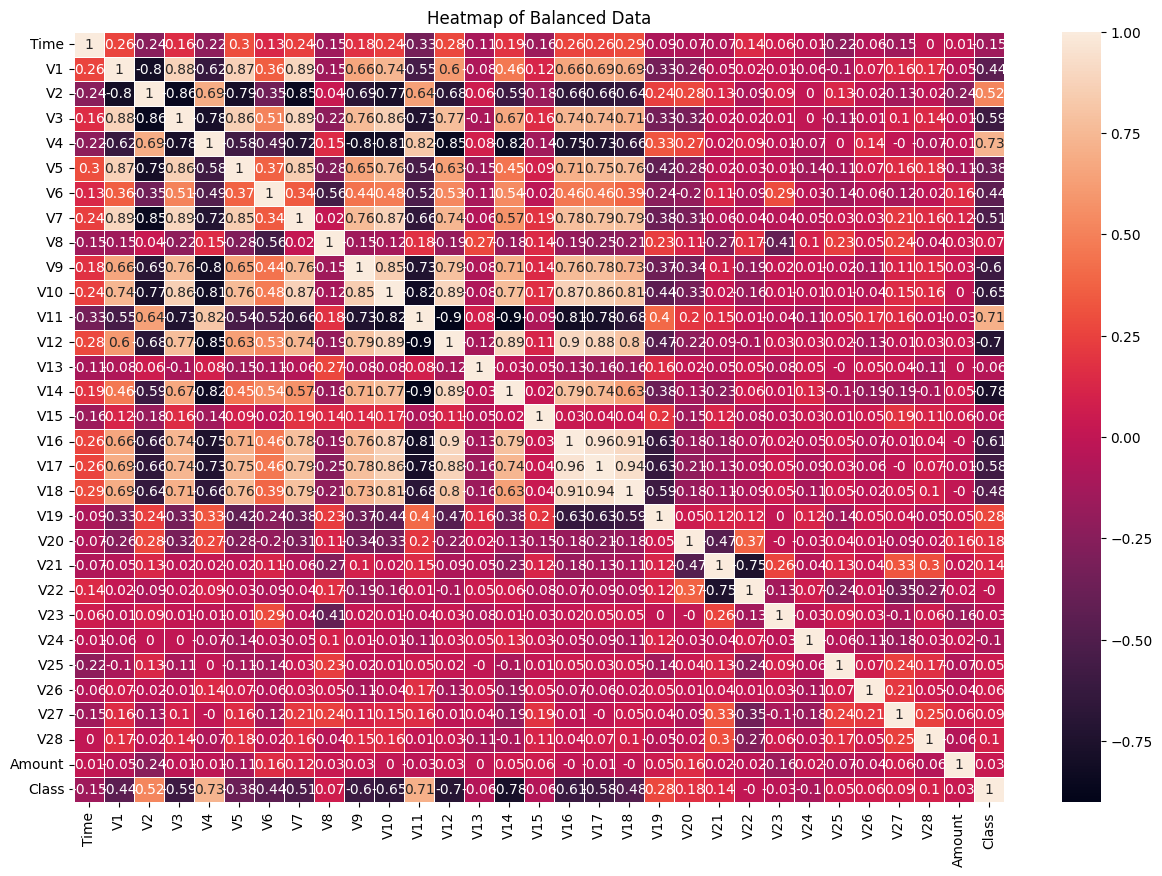

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Heatmap of Balanced Data')
sns.heatmap( round( balanced_df.corr() , 2 ) , annot=True , linewidths=.5)
plt.show()

**Analysis of the Correlation on balanced data** :

1. **Negative Correlations**: V17, V14, V12 , V9 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

2. **Positive Correlations**: V2, V4, V11 and V19 are positively correlated.


In [ ]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix

<Axes: title={'center': 'Heatmap of imbalanced dataset'}>

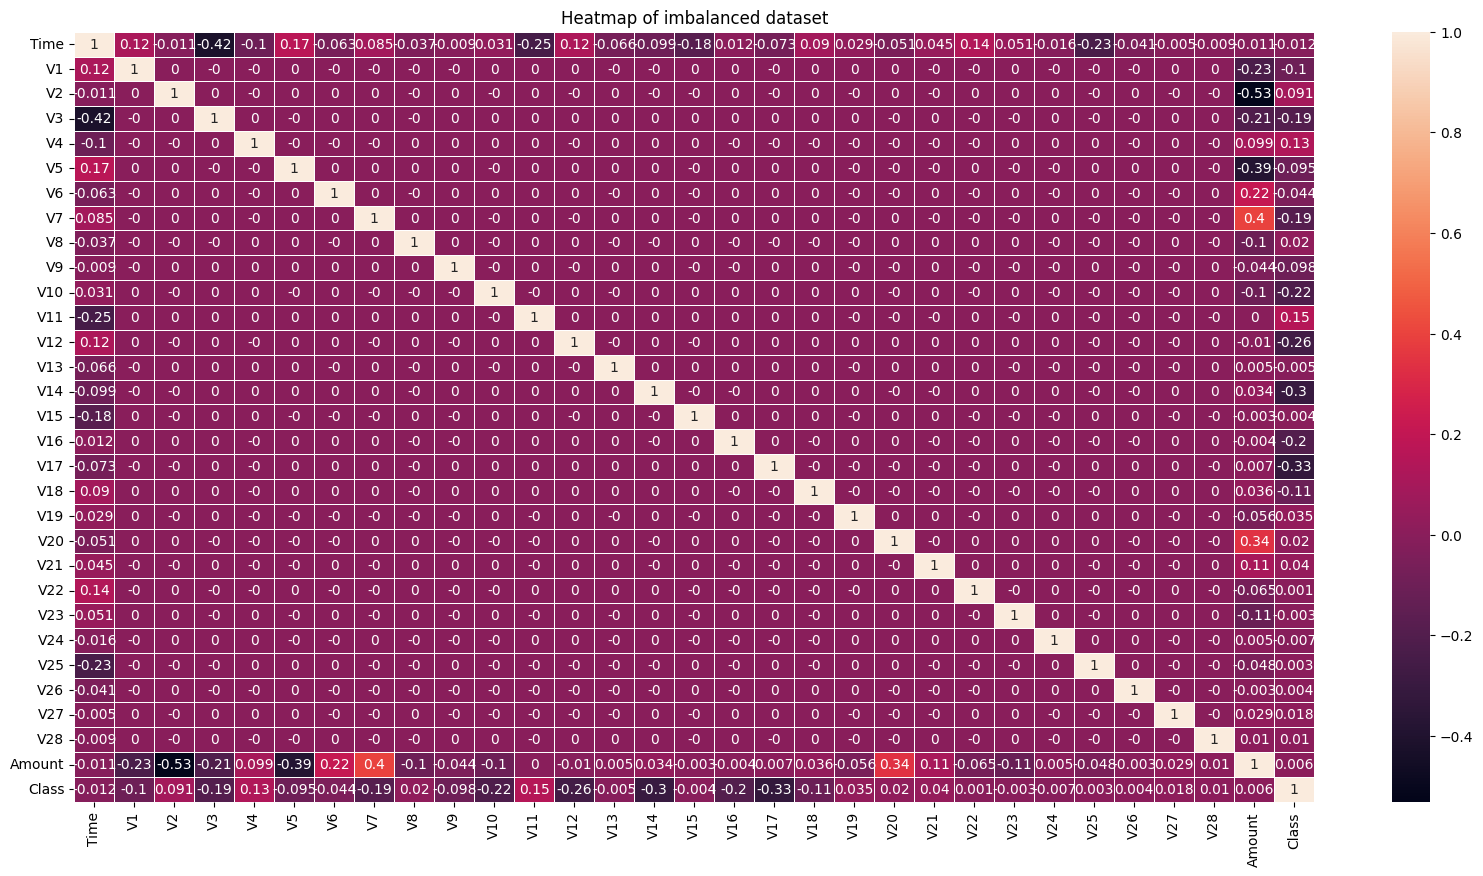

In [ ]:
plt.figure(figsize=(20,10))
cor = round( df.corr() , 3)
plt.title('Heatmap of imbalanced dataset')
sns.heatmap( cor ,annot=True ,  linewidth=0.5 )

In [ ]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features

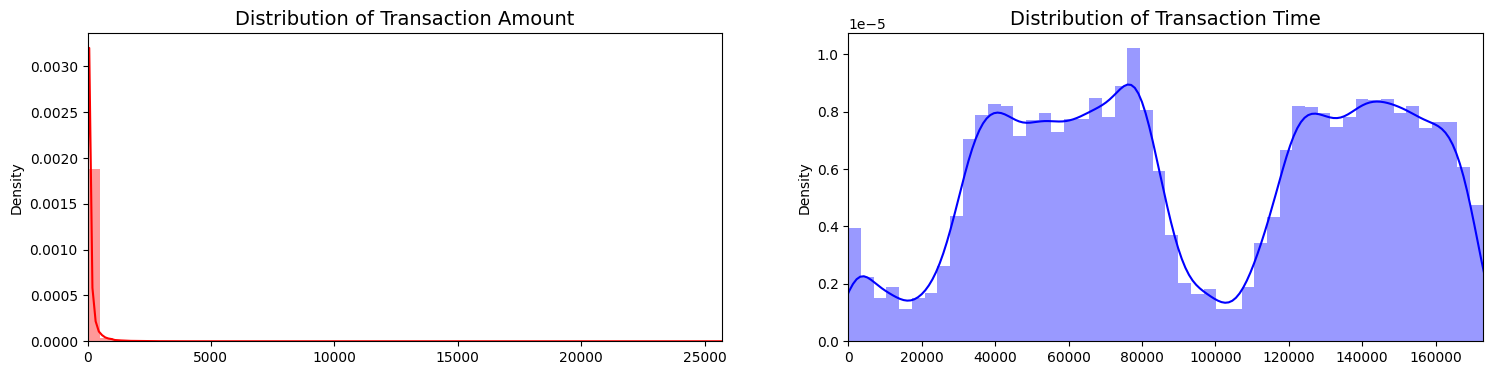

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

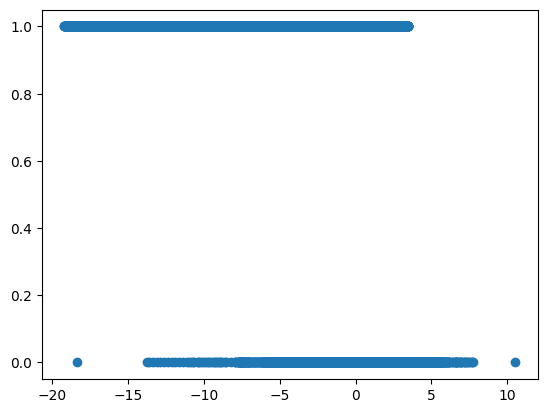

In [ ]:
plt.scatter(balanced_df['V14'] , y_balanced)
plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
    1. one of the most important challenges in the data set is most of the data belongs to one class and the data is exteremly imbalancd beacause the proportion of the minory class ( frauds )  is less than 1% of the data; so if we use this dataset to algorithms to train our models the models most probably will overfit so to avoid that we will use SMOTE method to balance our data.
    2. Adaptive and Evolving Fraud Tactics:
    Fraudulent behavior evolves over time as fraudsters develop new techniques to bypass detection systems. This leads to a phenomenon known as concept drift, where the underlying distribution of the data changes, making previously learned patterns less effective

    3. second is time and amount features are not scaled.
----

2. Analyze the correlation matrix of the features.
    
    Analysis is been mentioned in the below of the correlation matrix cells.

----

3. Is your data linearly separable? Please provide a rationale.

No, these are the reasons:
  1. First of all data set is a high dimensional dataset.
  so we cant properly plot the dataset and seprate data with a significat line.
  2. Second, the relationships between features and the target variable (fraud or not) are often complex and intertwined.
  3. the significant class imbalance

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
  - resampling is been done on dataset , i chose oversamling by using SMOTE method.
* Handling Imbalanced Data
* ...


#### Data Balancing is been done above.

#### Remving some of outliers :

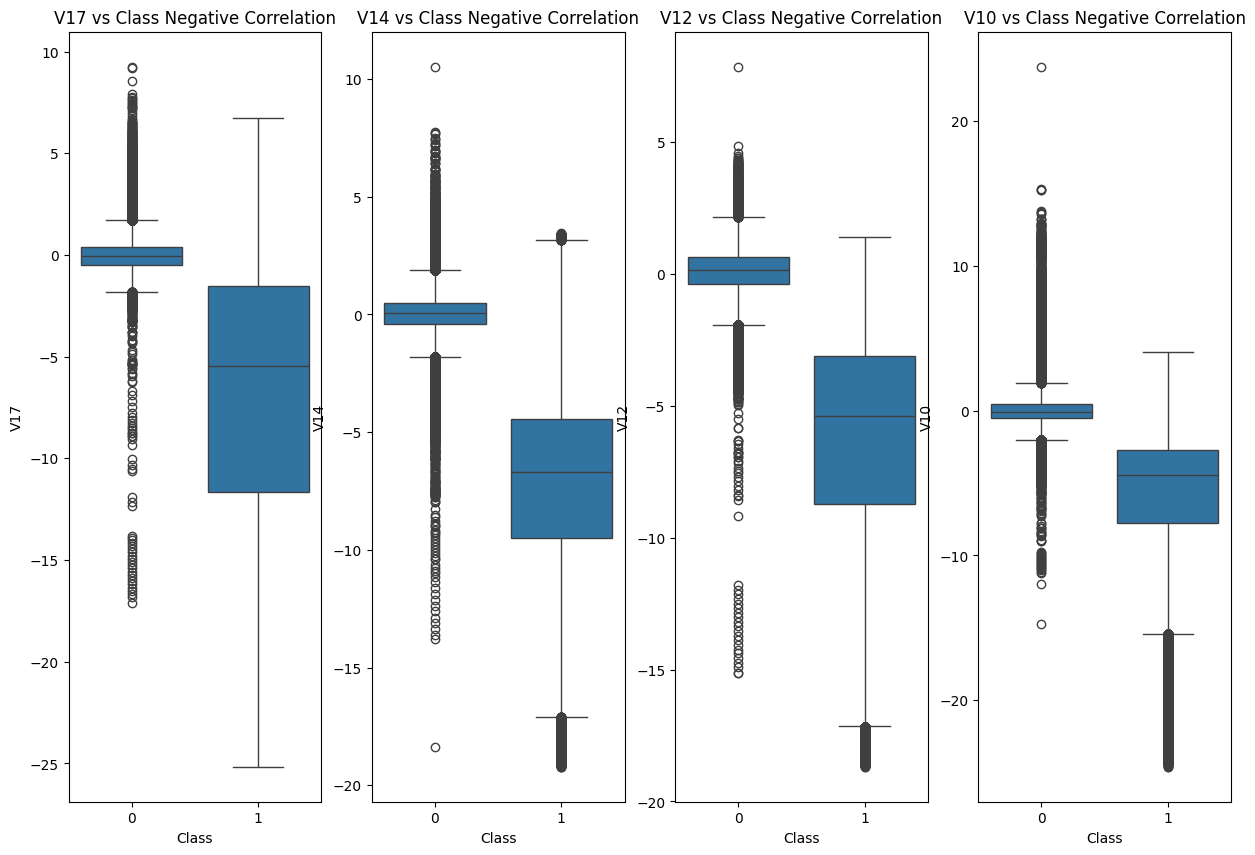

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(15,10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot( x="Class", y="V17", data=balanced_df , ax=axes[0] )
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=balanced_df , ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=balanced_df , ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=balanced_df , ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [ ]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = balanced_df['V14'].loc[balanced_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

balanced_df= balanced_df.drop(balanced_df[(balanced_df['V14'] > v14_upper) | (balanced_df['V14'] < v14_lower)].index)
print('----' * 20)

Quartile 25: -9.499624476857832 | Quartile 75: -4.439547569822372
iqr: 5.0600769070354605
Cut Off: 7.590115360553191
V14 Lower: -17.089739837411024
V14 Upper: 3.150567790730819
Feature V14 Outliers for Fraud Cases: 2230
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594, -17.7216383537133, -17.4759212828566, -17.230202160711, -17.6206343516773, 3.44242199594215, -18.218308604904387, 3.2432179071880385, -17.11790064436272, -17.659375253597617, -17.23143818454754, -17.61939373697666, -17.230954944568204, -17.70130479569147, -18.417134123144667, -17.497062462398745, -17.493429731329016, 3.2699742146898565, -17.497149799736057, -17.53176932696915, -17.533505845764292, -17.733712279074368, -18.158325475546327, -18.04708735423414, -17.679187761613097, -17.929659637657146, -17.576747871224644, -17.74251501736247, -18.61387636253451, -17.61578673066736, -18.807751026077916, -17.20773382937375, -17.67066781147197, -17.629331417198895, -17.485516931802238, -

Text(0.5, 1.0, 'V14 vs Class Negative Correlation')

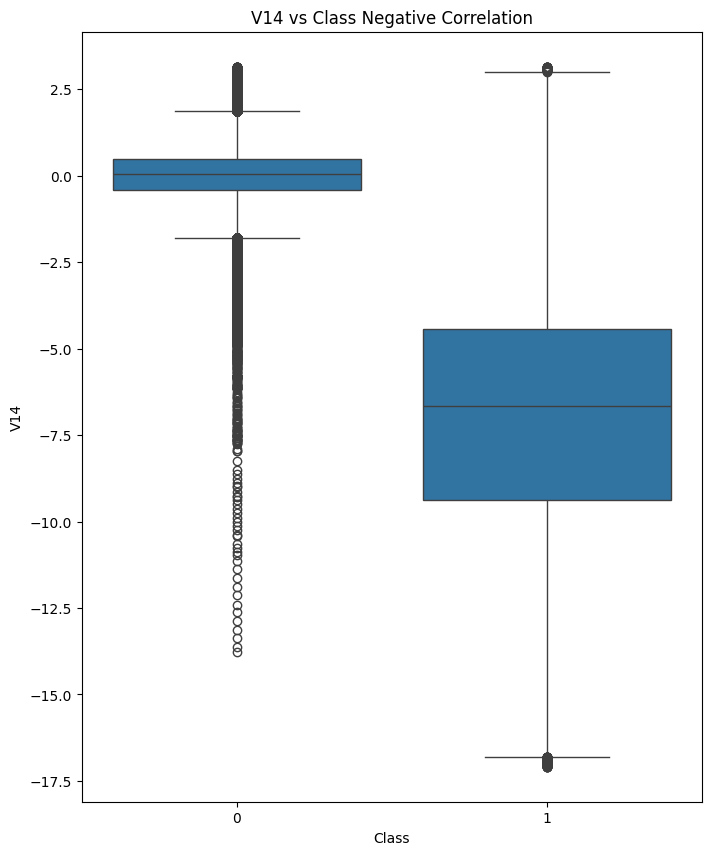

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(x="Class", y="V14", data=balanced_df )
plt.title('V14 vs Class Negative Correlation')

In [ ]:
# Removing outliers V10 Feature
v10_fraud = balanced_df['V10'].loc[balanced_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
balanced_df = balanced_df.drop(balanced_df[(balanced_df['V10'] > v10_upper) | (balanced_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(balanced_df)))

V10 Lower: -15.291497340899241
V10 Upper: 4.845326772822586
V10 outliers: [-16.6496281595399, -18.2711681738888, -15.5637913387301, -15.5637913387301, -16.7460441053944, -15.3460988468775, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.1415136412892, -16.3035376590131, -16.2556117491401, -16.6011969664137, -18.9132433348732, -20.9491915543611, -19.836148851696, -23.2282548357516, -24.4031849699728, -24.5882624372475, -16.295143912376943, -23.141354050708976, -16.268703391525495, -16.542849684608637, -15.719511275097863, -16.260487085239596, -22.1870885620007, -20.09265825260917, -15.5637913387301, -16.261688138102762, -16.05666136309335, -21.33418511557138, -16.258462122954167, -15.5637913387301, -21.479941997878104, -15.5637913387301, -16.286336216019514, -20.053431608720555, -16.287343610783516, -16.30298629574618, -15.645411723542452, -15.5637913387301, -16.88563980324985, -15.749289519508743, -16.113363584591184, -22.1870885620007, -16.5115253042287

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

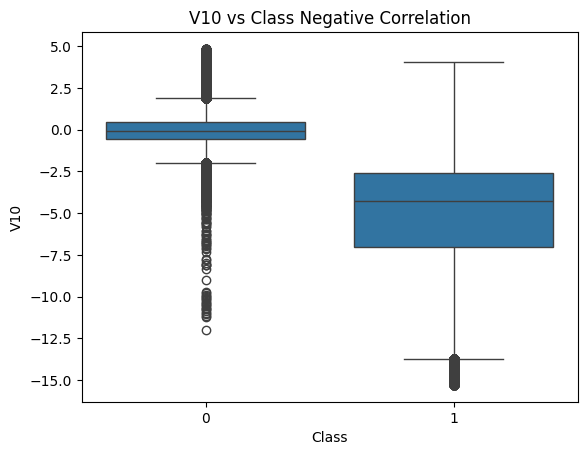

In [ ]:
sns.boxplot(x="Class", y="V10", data=balanced_df )
plt.title('V10 vs Class Negative Correlation')

In [ ]:
balanced_df.shape , balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554176 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    554176 non-null  float64
 1   V1      554176 non-null  float64
 2   V2      554176 non-null  float64
 3   V3      554176 non-null  float64
 4   V4      554176 non-null  float64
 5   V5      554176 non-null  float64
 6   V6      554176 non-null  float64
 7   V7      554176 non-null  float64
 8   V8      554176 non-null  float64
 9   V9      554176 non-null  float64
 10  V10     554176 non-null  float64
 11  V11     554176 non-null  float64
 12  V12     554176 non-null  float64
 13  V13     554176 non-null  float64
 14  V14     554176 non-null  float64
 15  V15     554176 non-null  float64
 16  V16     554176 non-null  float64
 17  V17     554176 non-null  float64
 18  V18     554176 non-null  float64
 19  V19     554176 non-null  float64
 20  V20     554176 non-null  float64
 21  V21     554176 

((554176, 31), None)

#### Normilizing & Scaling data

Shuffling data rows because i used SMOTE to oversample my data.

In [26]:
print(balanced_df.head(3))
balanced_df = balanced_df.sample(frac=1)
print(balanced_df.head(3))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]
                 Time        V1        V2        V3        V4        V5  \
315034   64594.899799  0.594113  0.745862 -0.504400  2.93455

In [27]:
X = balanced_df.drop(['Class'], axis=1)
y = balanced_df['Class']

In [28]:
X.shape , y.shape

((568630, 30), (568630,))

In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler
stsc = StandardScaler()
nrml = MinMaxScaler()
X_ = stsc.fit_transform(X)
X_ = nrml.fit_transform(X_)
X_.shape , X_

((568630, 30),
 array([[3.73830385e-01, 9.68387027e-01, 7.75128312e-01, ...,
         4.18667685e-01, 3.12539206e-01, 1.38795156e-03],
        [8.66047658e-01, 9.74217909e-01, 7.89443395e-01, ...,
         4.21308932e-01, 3.12455176e-01, 1.79467016e-04],
        [7.89903468e-01, 9.46183982e-01, 7.82153306e-01, ...,
         4.20095686e-01, 3.16210333e-01, 6.85839020e-04],
        ...,
        [3.28961989e-01, 8.61798257e-01, 7.70363405e-01, ...,
         4.55067233e-01, 2.84404506e-01, 5.90358707e-02],
        [4.17125760e-02, 9.23359211e-01, 7.88879375e-01, ...,
         4.07514456e-01, 3.24434944e-01, 1.35789859e-03],
        [7.18997407e-01, 9.76529390e-01, 7.46900997e-01, ...,
         4.14929405e-01, 3.13232484e-01, 1.67839833e-02]]))

In [30]:
X = X_

## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








#### Splitting the data

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=.33 , random_state=0 )

In [32]:
X_test ,X_valid , y_test , y_valid = train_test_split( X_test , y_test , train_size=.2 , random_state=0 )

### Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

LR_model = LogisticRegression()
LR_model.fit(X_train , y_train)

print("cross val score for LR model is:" , cross_val_score( LR_model , X_train , y_train , cv=5) )

deter = LR_model.predict(X_test)
print("Prediction_Score" ,accuracy_score(y_test ,deter))


cross val score for LR model is: [0.97 0.98 0.97 0.97 0.98]
Prediction_Score 0.9747101361451137


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score


LR_model = LogisticRegression()
LR_model.fit(X_train , y_train)

print("cross val score for LR model is:" , cross_val_score( LR_model , X_train , y_train , cv=5) )

deter = LR_model.predict(X_valid)
print("Prediction_Score" ,accuracy_score(y_valid ,deter))

recall = recall_score(y_valid, deter)
precision = precision_score(y_valid, deter)
f1 = f1_score(y_valid, deter)

print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

cross val score for LR model is: [0.97045031 0.97082334 0.97162195 0.97204828 0.97082256]
Prediction_Score 0.9710814437623652
Recall: 0.95
Precision: 0.99
F1 Score: 0.97


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Scaled data with both MinMaxScaler & StandardScaler

Confusion matrix, without normalization
[[34832  1707]
 [  423 37297]]


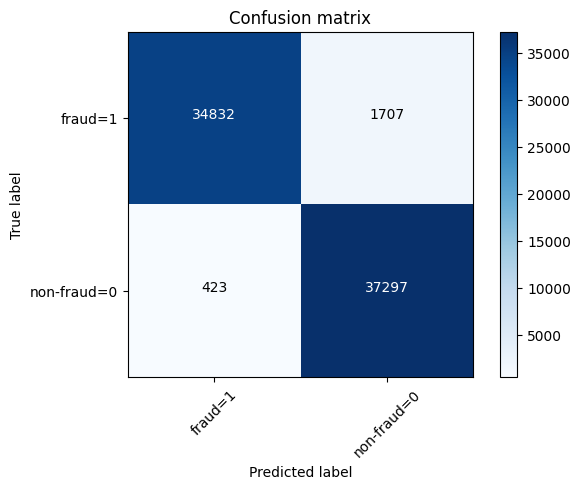

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
#classification_report(y_true= y_test , y_pred=deter )

cnf_matrix = confusion_matrix(y_true=y_test, y_pred=deter, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fraud=1','non-fraud=0'],normalize= False,  title='Confusion matrix')

Only applied StandardScaler on data

Confusion matrix, without normalization
[[35071  1468]
 [  410 37310]]


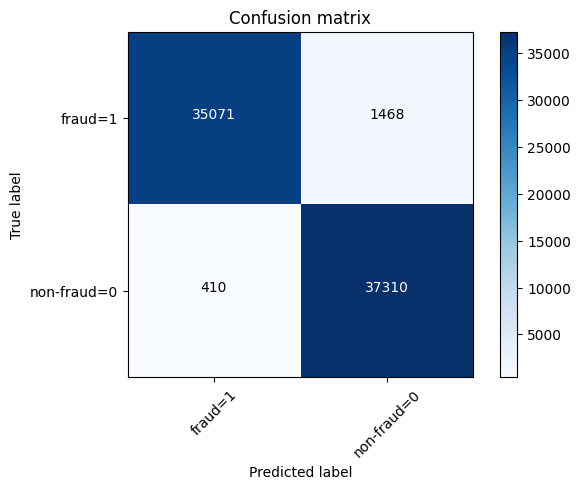

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
#classification_report(y_true= y_test , y_pred=deter )

cnf_matrix = confusion_matrix(y_true=y_test, y_pred=deter, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fraud=1','non-fraud=0'],normalize= False,  title='Confusion matrix')

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [ ]:
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report

#kernels = [ 'rbf' , 'linear' , 'poly', 'sigmoid', 'precomputed' ]
kernels = [ 'rbf' , 'linear' , 'poly' ]

for i in kernels:
    model = svm.SVC( kernel = i )
    model.fit( X_train , y_train )
    y_hat = model.predict ( X_test )
    print ( "when kernel = {} then jaccard score is {} and the classification report is {} ".format( i , jaccard_score(y_hat , y_test) ,
                                                             classification_report ( y_hat , y_test)) )

when kernel = rbf then jaccard score is 0.9587780841363872 and the classification report is               precision    recall  f1-score   support

           0       0.99      0.97      0.98     38898
           1       0.97      0.99      0.98     35361

    accuracy                           0.98     74259
   macro avg       0.98      0.98      0.98     74259
weighted avg       0.98      0.98      0.98     74259
 
when kernel = linear then jaccard score is 0.9469387755102041 and the classification report is               precision    recall  f1-score   support

           0       0.99      0.96      0.97     39100
           1       0.96      0.99      0.97     35159

    accuracy                           0.97     74259
   macro avg       0.97      0.97      0.97     74259
weighted avg       0.97      0.97      0.97     74259
 
when kernel = poly then jaccard score is 0.9706541341056888 and the classification report is               precision    recall  f1-score   support

         

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?

  LR: A linear model that estimates the probability that a given instance belongs to a particular class using a logistic function.

  SVM : A model that aims to find the hyperplane that best separates different classes by maximizing the margin between the closest points of the classes (support vectors).
  Can be both linear and non-linear. Non-linear SVMs use kernel functions to transform the data into higher dimensions where it is linearly separable.

SVM with polynomial kernel was better.


----

2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.

yes beacuse after applying SMOTE method on data it's been  converted to a balanced data set so we can use accuracy.


----
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

Resample the Dataset , removing anomalies , Feature Engineering ...

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

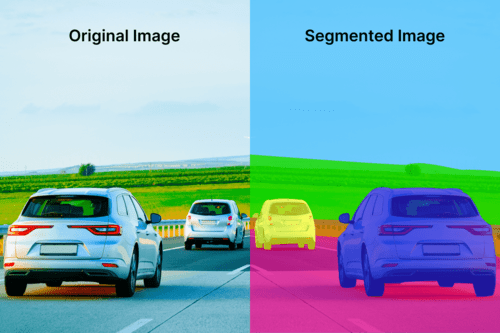

## Load Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 52.7MB/s]


In [5]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


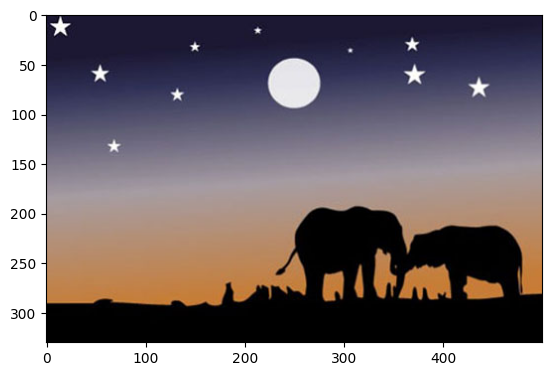

In [6]:
plt.imshow(im) # as RGB Format
plt.show()

In [6]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [7]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(all_pixels)

print("Before PCA", all_pixels.shape)
print("After PCA", X_pca.shape)

Before PCA (165000, 3)
After PCA (165000, 2)


In [21]:
X_pca[0]

array([-101.57789956,   -9.93644152])

## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








In [8]:
from sklearn.cluster import KMeans
# Elbow Method or # Silhouette Score
# The optimal number of clusters when clustering all pixels represents the predominant colors in an image.
X_pix = all_pixels
inertia = []
for n in range(3 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 0   , algorithm='elkan') )
    algorithm.fit( X_pix )
    inertia.append(algorithm.inertia_)


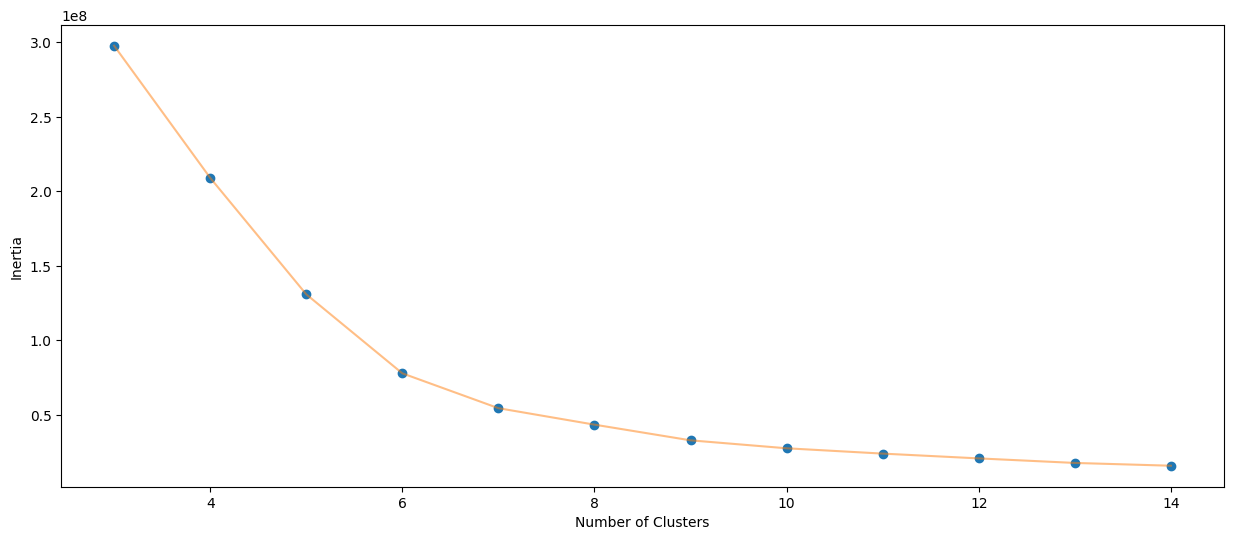

In [9]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(3, 15) , inertia , 'o')
plt.plot(np.arange(3 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

According to the Lbow fihgure above, the efficient cluster number equals to 7 or 8 beacuse after those points the graph goes nearly in a constant mode.

## Visualize Dominant Color

In [11]:
# Now that you have the number of dominant colors (clusters),
# use clustering to determine the cluster of each pixel.
model = KMeans( n_clusters = 7  , init = 'k-means++' , n_init = 15 ,random_state = 0 )
model.fit( X_pix )
labels = model.labels_
#dominant_colors = None
#kmeans = None


Visualizing daat which is been applied PCA on.

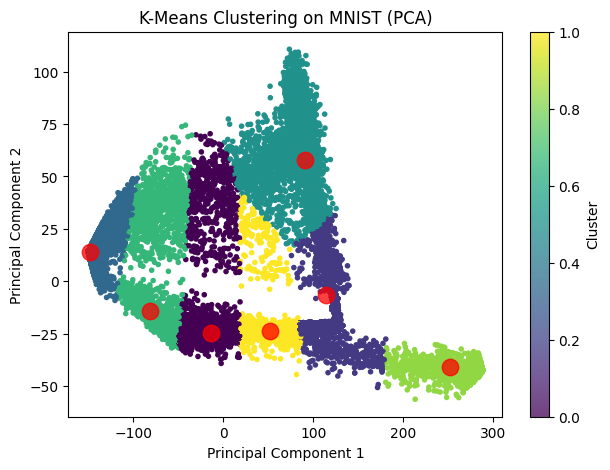

In [24]:
# Predict the cluster for each data point
clusters = model.predict(X_pix)
centers = model.cluster_centers_

plt.figure(figsize=(7, 5))
scatter = plt.scatter( X_pca[:, 0], X_pca[:, 1] ,  c=clusters, cmap='viridis', marker='.')
scatter = plt.scatter( centers[:, 0], centers[:, 1] , c='red', s=140 , alpha=0.75, marker='o')
plt.title('K-Means Clustering on MNIST (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

Visualizing data without using PCA and in a 3D form.

X_pix == all_pixels

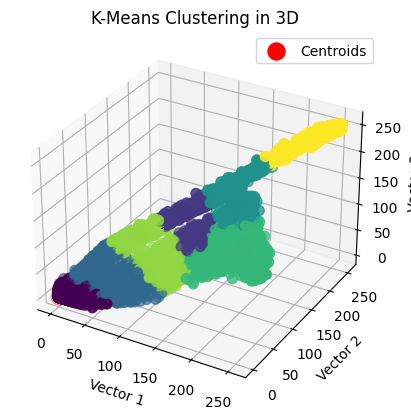

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
clusters = model.predict(X_pix)
centers = model.cluster_centers_

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with different colors for each cluster
scatter = ax.scatter(X_pix[:, 0], X_pix[:, 1], X_pix[:, 2], c=clusters, cmap='viridis', marker='o', s=50)

# Plot cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='o', s=150 , label='Centroids')

# Add labels and title
ax.set_xlabel('Vector 1')
ax.set_ylabel('Vector 2')
ax.set_zlabel('Vector 3')
ax.set_title('K-Means Clustering in 3D')

# Add a legend
ax.legend()

# Show the plot
plt.show()


## Segmenting original image

In [13]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


In [14]:
model.cluster_centers_.shape , model.labels_.shape


((7, 3), (165000,))

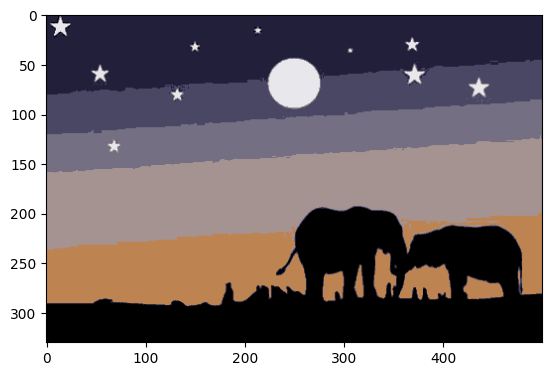

In [15]:
colors = model.cluster_centers_
lables = model.labels_

# Iterate over the image
for ix in range( new_img.shape[0] ):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()